# Homework 3: Kaggle ML & Data Science Survey


**Submission Instructions**

---
It is important that you follow the submission instructions. 
1. Copy this assignment notebook to your Drive. <font color = 'red'> `File` --> `Save a copy in Drive`</font>. Rename it as <font color = 'green'>`Lastname_Firstname_hw3`</font>.

2. Write your solutions in the cells  marked <font color = 'green'>`# your code`</font>.

3. **Do not delete your outputs. They are essential for the grading. Make sure that cells containing your solutions are executed, and the results are displayed in the notebook.**

4. When you're done, please submit your solutions as an <font color="red">`.ipynb`</font> file. To do so:


*   Click on <font color="red">`File`</font>  at the top left on the Colab screen, then click on <font color = 'red'>`Download .ipynb`</font>.
*   Then submit the downloaded <font color="red">`.ipynb`</font> version of your work on SUCourse.

For any question, you may send an email to the TAs and LAs.

---

In this homework, you will work on a dataset about [2017 Kaggle Machine Learning & Data Science Survey](https://www.kaggle.com/datasets/kaggle/kaggle-survey-2017). Dataset contains information about an industry-wide survey conducted by Kaggle in 2017 to establish a comprehensive view of the state of data science and machine learning 

For this homework, you will use the provided file `Job_Satisfaction_Survey.csv`. This is a modified version of the original dataset.
<!-- This is not the original data file, we modified and eliminated some parts. -->

Below, you can find all the set of features, provided in the dataset:


  1.   **ID:** Unique ID assigned by system

  2.   **GenderSelect:** Select your gender identity. - Selected Choice

  3.   **Country** Select the country you currently live in.

  4.   **Age:** What's your age?
  
  5.   **CurrentJobTitleSelect:** Select the option that's most similar to your current job/professional title (or most recent title if retired). - Selected Choice
  
  6.   **LanguageRecommendationSelect:** What programming language would you recommend a new data scientist learn first? (Select one option) - Selected Choice
  
  7.   **FormalEducation:** Which level of formal education have you attained?

  8.   **Tenure:** How long have you been writing code to analyze data?

  9.   **MLSkillsSelect** In which areas of machine learning do you consider yourself competent? (Select all that apply) - Selected Choice

  10.   **MLTechniquesSelect:** In which machine learning techniques do you consider yourself competent? (Select all that apply) - Selected Choice
  
  11.   **EmployerSize:** How many employees work at your current or most recent company?
  
  12.   **WorkChallengeFrequencyExplaining:** How often did you experience these barriers or challenges within the past year? - Explaining data science to others
  
  13.   **WorkChallengeFrequencyTalent:** How often did you experience these barriers or challenges within the past year? - Lack of data science talent in the organization

  14.   **WorkChallengeFrequencyClarity:** How often did you experience these barriers or challenges within the past year? - The lack of a clear question to be answering

  15.   **WorkChallengeFrequencyDataAccess** How often did you experience these barriers or challenges within the past year? - Unavailability of/difficult access to data

  16.   **CompensationScore:** Indicator for compensation of the employee.
  
  17.   **RemoteWork:** How often do you work remotely?
  
  15.   **Continent** Select the continent you currently live in.

  16.   **Income:** What is your income?
  
  17.   **IncomeCurrency:** How is your income paid? (Dollar or Euro)
  
  18.   **JobSatisfaction:** How satisfied are you with your current job? On a scale from 0 (Highly Dissatisfied) - 10 (Highly Satisfied)


*Do not forget to add the shared `Job_Satisfaction_Survey.csv` file to your drive and mount to your drive. Otherwise, you won't be able to read the file.*



In [ ]:
from google.colab import drive
drive.mount("./drive")

Mounted at ./drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join

%matplotlib inline

In [ ]:
fname = "Job_Satisfaction_Survey.csv"
path_prefix = '/content/drive/MyDrive/Colab Notebooks/hw3 cs210/'
df = pd.read_csv(join(path_prefix, fname))
df.head(2)

,ID,GenderSelect,Country,Age,CurrentJobTitleSelect,LanguageRecommendationSelect,FormalEducation,Tenure,MLSkillsSelect,MLTechniquesSelect,...,WorkChallengeFrequencyTalent,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,CompensationScore,WorkMLTeamSeatSelect,RemoteWork,JobSatisfaction,Continent,Income,IncomeCurrency
0,1,Male,Pakistan,28.0,Software Developer/Software Engineer,SAS,Bachelor's degree,3 to 5 years,Survival Analysis,"Hidden Markov Models HMMs,Logistic Regression,...",...,NaN,NaN,NaN,8.0,Standalone Team,NaN,4,AS_,110077,euro
1,2,Male,Mexico,26.0,Computer Scientist,Python,Master's degree,1 to 2 years,"Natural Language Processing,Supervised Machine...","Bayesian Techniques,Support Vector Machines (S...",...,Often,NaN,NaN,NaN,Business Department,NaN,7,NA_,128111,dollar


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Q1: Removing Columns with High Missing Values (15 points)

It is not possible to find a perfect dataset. During data collection, some values can be lost. These lost values are called as missing values. In the DataFrame, missing values are usually labelled as `NaN`.

In this question, you will remove the columns which contain high number of missing values. If the missing value percentage in a column is greater than or equal to 20%, you will drop that column. 
* First, print the shape (Number of rows and columns) of the dataset.
* Secondly, if missing value percentage in a column is greater than or equal to 20%, print the name of the column and the percentage of missing values in that column. Also, remove this column from dataset.
* Lastly, after removing columns, print the number of remaining columns in the dataset.

Your output should be like:
```
Initially, there are [...] rows and [...] columns

[...]% of the values are missing in [...] column
.
.
.

After removing columns with high missing value percentage, there are [...] columns 
```

In [ ]:
def isNaN(num):
   
    return num != num

def remowingColums(df):
   
    sp=df.shape
   
    print("Initially, there are", sp[0], "rows and ",sp[1]," columns")
    
    delList=[]
    for i in df.keys():
        c=0
        for j in df[i]:
            if isNaN(j):
                c+=1
        if int(sp[0])/4 < c :
            per=(c/sp[0])*100
            print( round(per)," % of the values are missing in",str(i))
            delList.append(i)
    
    df=df.drop(delList, axis=1)
    print("After removing columns with high missing value percentage, there are",df.shape[1],"columns ")
    return df
df=remowingColums(df)


Initially, there are 5450 rows and  22  columns
77  % of the values are missing in WorkChallengeFrequencyExplaining
57  % of the values are missing in WorkChallengeFrequencyTalent
69  % of the values are missing in WorkChallengeFrequencyClarity
69  % of the values are missing in WorkChallengeFrequencyDataAccess
After removing columns with high missing value percentage, there are 18 columns 


## Q2: Calculating Skill Amounts (15 points)

In the survey, people were asked in which area of machine learning (`MLSkillsSelect`) and which machine learning technique (`MLTechniquesSelect`) they consider themselves more competent. Some people gave one answer, but others gave a lot of answers separated by commas.

In this question, your task is to:

- Create two new column called `MLSkillsSelect_Amount` and `MLTechniquesSelect_Amount` which will store the number of answers given in `MLSkillsSelect` and `MLTechniquesSelect` respectively.
- Then, print basic statistics (mean, std, min, max, etc.) on these two columns. Remember that there is function that you can use to achieve this goal.


Your answer should be exactly same as the figure below:

<img src="https://i.ibb.co/FKwc5BR/describe-plot.png" alt="describe-plot" border="0" width="400">




In [ ]:

def addSkillNumRow(df):
   
   
    MLSkillsSelectnum=[]
    MLTechniquesSelectnum=[]
   
    for i in df["MLSkillsSelect"]:
        if isNaN(i):
            MLSkillsSelectnum.append(0)
        else:
            MLSkillsSelectnum.append(len(str(i).split(",")))
           
           
       
    for i in df["MLTechniquesSelect"]:
        if isNaN(i):
            MLTechniquesSelectnum.append(0)
        else:
            MLTechniquesSelectnum.append(len(str(i).split(",")))
       
    df.insert(9, "MLSkillsSelect_Amount",list(MLSkillsSelectnum) , True)
    df.insert(11, "MLTechniquesSelect_Amount", list(MLTechniquesSelectnum) , True)
    return df
   
addSkillNumRow(df)

def writeStats(df):
    return print(df[["MLSkillsSelect_Amount","MLTechniquesSelect_Amount"] ]
                 .describe(include="all"))
   
writeStats(df)

       MLSkillsSelect_Amount  MLTechniquesSelect_Amount
count            5450.000000                5450.000000
mean                2.648991                   4.164954
std                 1.691120                   2.735368
min                 0.000000                   0.000000
25%                 1.000000                   2.000000
50%                 2.000000                   4.000000
75%                 4.000000                   6.000000
max                13.000000                  14.000000


## Q3: How do Age and Education Level Affect Income? (35 points)

In the survey, people were asked about their annual earnings. However, while some of these earnings are in dollars, some of them are in euros. When examining this information, it would be good to convert them all to the same currency.

In addition, it seems that there are different values in the age column which you can see in the box plot below.

<img src="https://i.ibb.co/wchknnn/boxplot-210.png" alt="boxplot-210" border="0" width="350">

## Q3 Part A: Currency Conversion & Age Grouping (25 Points)

In this question, your task is to:

- Create a new column called `Income_Dollar` which will store all of the Incomes in dollar. (Take 1 Euro = 1.04 USD)
- Then, take only those over 18 (Included) and younger than 65 (Not Included) from the data. You can filter the existing data, create new data or delete from data. You will use this new data in questions after this question.
- Print the new number of rows after filtering Age column. 

Your output should be like
```
Number of rows after filtering Age column is [...]
```

- Finally, create a new column named `Age_Group` that contains age information in groups as string. 
- The Age Groups will be:
    - '[18-30)' (This means if age between 18 and 30, 30 is not included, Age_Group value will be '[18-30)' as string)
    - '[30-45)'
    - '[45-55)'
    - '[55-65)'

In [ ]:

def ageFilter(df):
    df = df[df['Age'].between(18, 64)]
    df.reset_index(inplace=True)
    print("Number of rows after filtering Age column is",df.shape[0])
    return df
       
df=ageFilter(df)
   
def incomeDollar(df):
    dollarlist=[]
    incomelist=df["Income"]
    IncomeCurrencylist=df["IncomeCurrency"]
    for i in range(df.shape[0]):
       if IncomeCurrencylist[i] =="dollar" :
           
           dollarlist.append(incomelist[i])
           
       else:
            dolars=incomelist[i]* (104/100)
            dollarlist.append(dolars)
    df.insert(21, "Income_Dollar",list(dollarlist) , True)
    return df
   
incomeDollar(df)

def ageCluster(df):
    agelist=[]
    for i in df['Age']:
       
        if isNaN(i):
            agelist.append('0')
        else:
            if int(i)>=18 and int(i)<30 :
                agelist.append('[18-30)')
            elif int(i)>=30 and int(i)<45 :
                agelist.append('[30-45)')
            elif int(i)>=45 and int(i)<55 :
                agelist.append('[45-55)')
            elif int(i)>=55 and int(i)<65 :
                agelist.append('[55-65)')
            else:
                agelist.append('0')
       
           
    df.insert(4, "Age_Group",list(agelist) , True)
    return df
ageCluster(df)

Number of rows after filtering Age column is 5343


,index,ID,GenderSelect,Country,Age_Group,Age,CurrentJobTitleSelect,LanguageRecommendationSelect,FormalEducation,Tenure,...,MLTechniquesSelect_Amount,EmployerSize,CompensationScore,WorkMLTeamSeatSelect,RemoteWork,JobSatisfaction,Continent,Income,IncomeCurrency,Income_Dollar
0,0,1,Male,Pakistan,[18-30),28.0,Software Developer/Software Engineer,SAS,Bachelor's degree,3 to 5 years,...,3,NaN,8.0,Standalone Team,NaN,4,AS_,110077,euro,114480.08
1,1,2,Male,Mexico,[18-30),26.0,Computer Scientist,Python,Master's degree,1 to 2 years,...,2,"1,000 to 4,999 employees",NaN,Business Department,NaN,7,NA_,128111,dollar,128111.00
2,2,3,Female,United States of America,[30-45),34.0,Data Analyst,Python,Doctoral degree,6 to 10 years,...,3,"1,000 to 4,999 employees",2.0,Other,Rarely,6,NA_,180486,dollar,180486.00
3,3,4,Female,United States of America,[30-45),33.0,Scientist/Researcher,Python,Doctoral degree,More than 10 years,...,2,"5,000 to 9,999 employees",2.0,Other,Rarely,9,NA_,140124,dollar,140124.00
4,4,5,Female,United States of America,[30-45),35.0,Software Developer/Software Engineer,Python,Doctoral degree,More than 10 years,...,4,"10,000 or more employees",8.0,Other,Rarely,8,NA_,183014,dollar,183014.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5338,5445,5525,Male,Canada,[45-55),48.0,Data Scientist,SAS,Doctoral degree,More than 10 years,...,4,20 to 99 employees,1.0,Business Department,Sometimes,8,NA_,171918,dollar,171918.00
5339,5446,5526,Male,Ireland,[18-30),27.0,Data Scientist,Python,Master's degree,3 to 5 years,...,1,100 to 499 employees,1.0,IT Department,Rarely,8,EU_,122412,euro,127308.48
5340,5447,5527,Female,United States of America,[30-45),30.0,Computer Scientist,Python,Doctoral degree,3 to 5 years,...,7,100 to 499 employees,2.0,Standalone Team,Sometimes,8,NA_,186889,dollar,186889.00
5341,5448,5528,Female,United States of America,[18-30),29.0,Operations Research Practitioner,Python,Master's degree,6 to 10 years,...,2,20 to 99 employees,6.0,Standalone Team,Rarely,9,NA_,126585,dollar,126585.00


## Q3 Part B: Plotting (10 Points)

In the previous part, all income information was converted to dollars and age information was grouped. Using these information, let's examine the relationship between the education level, income and age groups of the people surveyed.

In this question, your task is to:

- Plot the average `Income_Dollar` of each `FormalEducation` as bar chart and use `Age_Group` as color encoding.
- `FormalEducation` names in X axis should be rotated by 30 degrees
- Set the figure size as (10,6)
- Don' forget to add **legend** to show color representing Age Groups and add **title**

The result should be exactly same as the figure below.

<img src="https://i.ibb.co/9gf8mwN/barplot-210.png" alt="barplot-210" border="0" width="500">

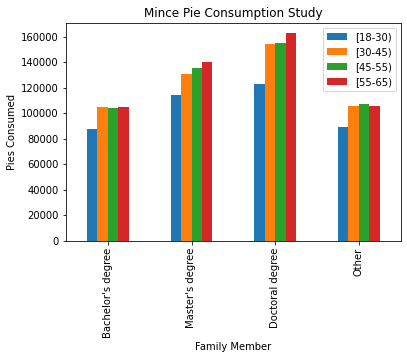

In [ ]:
def plot_Edu_Age_relation(df):
    fageQuantitiy=[]
    uniqdegreelist=[]
    degrees=["Bachelor's degree","Master's degree","Doctoral degree","Other"]
    
    ages=['[18-30)','[30-45)','[45-55)','[55-65)']
    c=0
    for i in degrees :
        tempdf=df[df['FormalEducation'].between(i,i)]
        
        income_df = tempdf[["Age_Group","Income_Dollar"]].groupby("Age_Group").mean().reset_index()
        if c ==0:
            merged_df=income_df
            merged_df.rename(columns = {'Income_Dollar':i}, inplace = True)
            c+=1
        else:
            merged_df=merged_df.merge(income_df, how='left', on='Age_Group')
            merged_df.rename(columns = {'Income_Dollar':i}, inplace = True)
    
  
    
    merged_df.drop(['Age_Group'], axis=1)
            
    plotdata = pd.DataFrame({str(ages[i]) :merged_df.iloc[i] for i in range(len(ages)) },
                             index=degrees)
    plotdata.plot(kind="bar")
    plt.title("Mince Pie Consumption Study")
    plt.xlabel("Family Member")
    plt.ylabel("Pies Consumed")
    plt.show()    
  
    
plot_Edu_Age_relation(df)      

## Q4: Correlation of Features (10 points)

In this question, you will check the correlation between each numerical feature in dataset. Your task is to create a heatmap to display correlations. 

* You should display a colorbar right next to figure.
* Annotate the heatmap with the correlation values for each pair. 
* Rotate the labels in X axis by 90 degrees to prevent overlapping.
* Set the figure size as (10,6)

The result should be exactly same as the figure below.

<img src="https://i.ibb.co/LSnPJyS/correlation-210.png" alt="correlation-210" border="0" width="600">

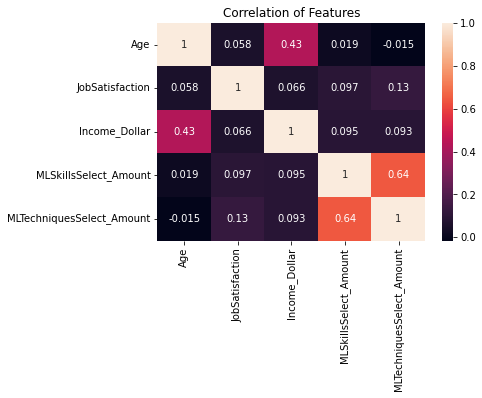

In [ ]:
def corrolationHeat(df):
    corrdf=df.filter(['Age',
                      'JobSatisfaction',
                      'Income_Dollar',
                      "MLSkillsSelect_Amount",
                      "MLTechniquesSelect_Amount"])
                     
    
    corr = corrdf.corr()
    
    sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True)
    plt.title('Correlation of Features')
    plt.show()
    
    
corrolationHeat(df)

## Q5: Plotting Job Satisfaction Around the World (25 points)

In the dataset, `Country` column indicates where people lives. Your task in this question is to use `GeoPandas` library to display the average Job Satisfaction on a world map. 

* In the cell below, you can find a `GeoDataFrame` object that contains country names (column `name`) and geometric information (column `geometry`) for each contry. 
* Iterate over `GeoDataFrame` object. For each country, find the average `Job Satisfaction` in the original dataset.
* Lastly, plot country averages on a world map. Some countries in the `GeoDataFrame` object will have 0 as average value since they do not exist in `Country` column. These countries will be automatically discarded by `GeoPandas` so they will not be shown on the world map. In order to prevent this, use `missing_kwds` parameter to set a default color for as 'lightgrey' these countries. 


The result should be exactly same as the figure below. You can set `cmap='OrRd'` for the color map and `figsize=(20,5)` for the figure size. Do not forget to add legend next to the world map.

<img src="https://i.ibb.co/Pc1Dn33/worldmap-210.png" alt="worldmap-210" border="0" width="700">

In [ ]:
# To install geopandas library, run the command below
!pip install geopandas

import geopandas as gpd

# world is a GeoDataFrame object
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name!="Antarctica")]
world.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.3 MB/s 
     |████████████████████████████████| 7.8 MB 53.5 MB/s 
     |████████████████████████████████| 16.6 MB 32.4 MB/s 


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


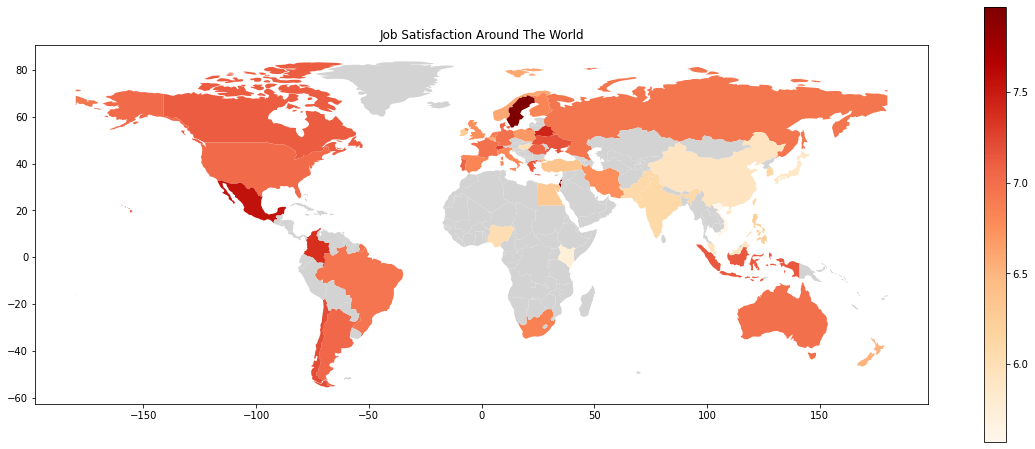

In [ ]:

def plot_world(df):
    avg_df = df[["Country","JobSatisfaction"]].groupby("Country").mean().reset_index()
    avg_df.rename(columns = {'Country':'name'}, inplace = True)
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world = world[(world.name!="Antarctica")]
    world.head()
    world= world.merge(avg_df, how='left', on='name')
    fig,ax = plt.subplots(1,1,figsize=(20,8))
    world.plot(column='JobSatisfaction',cmap='OrRd',legend=True,ax=ax,
             missing_kwds={"color": "lightgrey", "label": "Missing values", },)

    
    plt.title("Job Satisfaction Around The World")
    plt.show()
plot_world(df)
    
    